In [1]:
import mglearn
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid, StratifiedKFold

In [2]:
iris = load_iris()

In [3]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print('훈련 세트의 크기 : {}, 테스트 세트의 크기 : {}'.format(x_train.shape[0], x_test.shape[0]))

훈련 세트의 크기 : 112, 테스트 세트의 크기 : 38


In [4]:
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(x_train, y_train)
        score = svm.score(x_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C' : C, 'gamma' : gamma}
print('최고 점수 : {:.2f}'.format(best_score))
print('최적 매개 변수 : {}'.format(best_parameters))

최고 점수 : 0.97
최적 매개 변수 : {'C': 100, 'gamma': 0.001}


In [5]:
# validation set을 추가한 검증 세트
x_trainval, x_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_trainval, y_trainval, random_state=1)
print('훈련 세트의 크기 : {}, 검증 세트의 크기 : {}, 테스트 세트의 크기 : {}'.format(x_train.shape[0], x_val.shape[0], x_test.shape[0]))

훈련 세트의 크기 : 84, 검증 세트의 크기 : 28, 테스트 세트의 크기 : 38


In [6]:
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(x_train, y_train)
        score = svm.score(x_val, y_val)
        if score > best_score:
            best_score = score
            best_parameters = {'C' : C, 'gamma' : gamma}

svm = SVC(**best_parameters)
svm.fit(x_trainval, y_trainval)
test_score = svm.score(x_test, y_test)
print('검증 세트에서 최고 점수 : {:.2f}'.format(best_score))
print('최적 매개변수 : {}'.format(best_parameters))
print('최적 매개변수에서 테스트 세트 점수 : {:.2f}'.format(test_score))

검증 세트에서 최고 점수 : 0.96
최적 매개변수 : {'C': 10, 'gamma': 0.001}
최적 매개변수에서 테스트 세트 점수 : 0.92


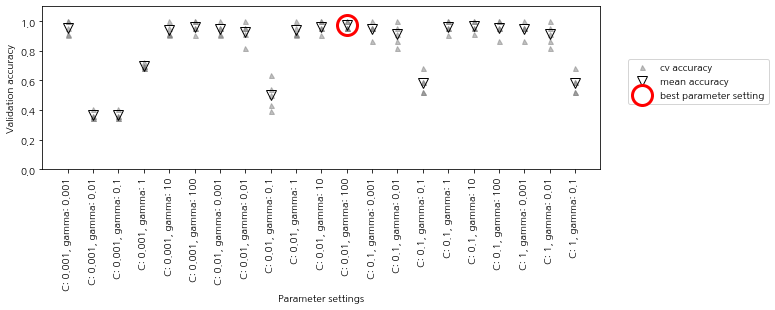

In [7]:
# 교차 검증을 사용한 그리드 서치
mglearn.plots.plot_cross_val_selection()

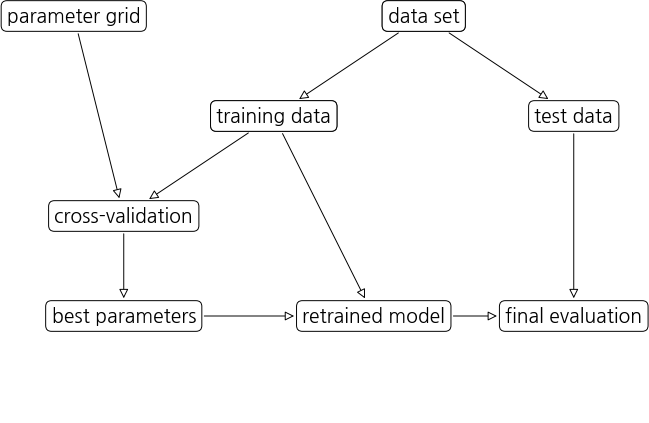

In [8]:
# 데이터를 나누고 그리드 서치를 적용하여 최종 매개변수를 평가하는 전체 과정
mglearn.plots.plot_grid_search_overview()

In [9]:
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
print('매개변수 그리드 : \n{}'.format(param_grid))

매개변수 그리드 : 
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [10]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [12]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [13]:
print('테스트 세트 점수 : {:.2f}'.format(grid_search.score(x_test, y_test)))
print('최적 매개변수 : {}'.format(grid_search.best_params_))
print('최상 교차 검증 점수 : {:.2f}'.format(grid_search.best_score_))

테스트 세트 점수 : 0.97
최적 매개변수 : {'C': 10, 'gamma': 0.1}
최상 교차 검증 점수 : 0.97


In [14]:
print('최고 성능 모델 : \n{}'.format(grid_search.best_estimator_))

최고 성능 모델 : 
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [15]:
result = pd.DataFrame(grid_search.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000399,0.000489,0.000200,0.000399,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
1,0.000399,0.000489,0.000399,0.000488,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
2,0.000606,0.000495,0.000199,0.000398,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
3,0.000399,0.000489,0.000398,0.000488,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
4,0.000592,0.000484,0.000000,0.000000,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581


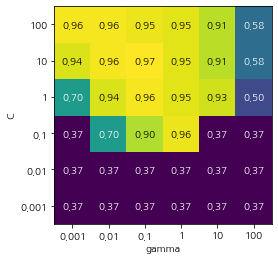

In [16]:
score = np.array(result.mean_test_score).reshape(6, 6)
mglearn.tools.heatmap(score, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap='viridis')

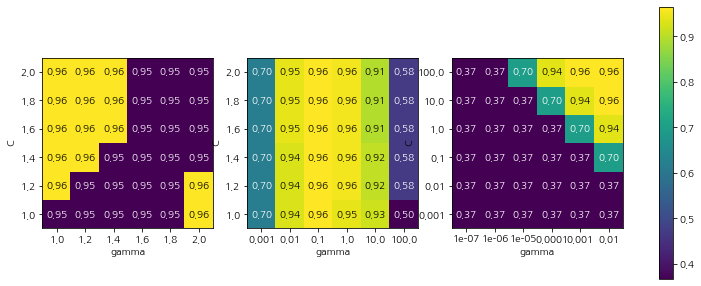

In [17]:
# 잘못된 검색 범위에 따른 결과 분석

# 첫번째 결과는 점수 변화가 거의 없어 전체 매개변수가 같은색이다.
# C와 gamma의 범위가 부적절한것으로 판단된다. 매개변수를 바꿔가며 정확도가 변하는지 살펴보는것이 좋다.

# 두번째 결과는 세로 띠 형태를 보인다.
# gamma 매개변수는 적절한 범위를 탐색하지만 C 매개변수는 그렇지 못한것을 알 수 있다.
# C의 범위를 조정하거나 C가 중요한 매개변수가 아닐 수 있다.

# 세번째 결과는 C와 gamma 둘 모두에 따라 값이 변했다.
# 하지만 왼쪽 아래 영역에서는 아무런 변화가 없었다. 오른쪽 위 부분이 포함되도록 검색 범위를 바꿔야한다.

fig, axes = plt.subplots(1, 3, figsize=(13, 5))
param_grid_linear = {'C' : np.linspace(1, 2, 6), 'gamma' : np.linspace(1, 2, 6)}
param_grid_one_log = {'C' : np.linspace(1, 2, 6), 'gamma' : np.logspace(-3, 2, 6)}
param_grid_range = {'C' : np.logspace(-3, 2, 6), 'gamma' : np.logspace(-7, -2, 6)}

for param_grid, ax in zip ([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(x_train, y_train)
    score = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    
    scores_image = mglearn.tools.heatmap(
        score, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='viridis', ax=ax)
plt.colorbar(scores_image, ax=axes.tolist())

In [18]:
# 비대칭 매개변수 그리드 탐색
param_grid = [{'kernel' : ['rbf'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel' : ['linear'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100]}]
print('그리드 목록 : \n{}'.format(param_grid))

그리드 목록 : 
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [19]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(x_train, y_train)
print('최적 매개변수 : {}'.format(grid_search.best_params_))
print('최고 교차 검증 점수 : {:.2f}'.format(grid_search.best_score_))

최적 매개변수 : {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
최고 교차 검증 점수 : 0.97


In [20]:
result = pd.DataFrame(grid_search.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000591,4.830477e-04,0.000406,4.977465e-04,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
1,0.000598,4.886166e-04,0.000199,3.989220e-04,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
2,0.000399,4.887528e-04,0.000199,3.989220e-04,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
3,0.000598,4.886167e-04,0.000000,0.000000e+00,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
4,0.000399,4.887529e-04,0.000399,4.885192e-04,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
5,0.000798,3.988984e-04,0.000200,3.991127e-04,0.001,100,rbf,"{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
6,0.000399,4.888113e-04,0.000199,3.988266e-04,0.01,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
7,0.000799,3.994077e-04,0.000199,3.989220e-04,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
8,0.000598,4.886166e-04,0.000399,4.885192e-04,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
9,0.000399,4.886360e-04,0.000399,4.884609e-04,0.01,1,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581


In [21]:
def nested_cv(x, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    for training_samples, test_samples in outer_cv.split(x, y):
        best_parms = {}
        best_score = -np.inf
        for parameters in parameter_grid:
            cv_scores = []
            for inner_train, inner_test in inner_cv.split(x[training_samples], y[training_samples]):
                clf = Classifier(**parameters)
                clf.fit(x[inner_train], y[inner_train])
                score = clf.score(x[inner_test], y[inner_test])
                cv_scores.append(score)
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_parms = parameters
        clf = Classifier(**best_parms)
        clf.fit(x[training_samples], y[training_samples])
        outer_scores.append(clf.score(x[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [22]:
score = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print('교차 검증 점수 : {}'.format(score))

교차 검증 점수 : [0.96666667 1.         0.96666667 0.96666667 1.        ]
